<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/Emotion_Recognition_Zidio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
'''
The dataset is organised such that each of the two female actor and their emotions are contain
within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format
'''

!mkdir -p ~/.kaggle
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
# !pip install IPython

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []                                    #strore file path for all the audio files
labels = []                                   # store labels for each audio file
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())            #Extract and store labels from the filenames by splitting them
    if len(paths) == 2800:                      # stop when desired no. of files are reached
      break
print(len(paths))
print(len(labels))

2800
2800


In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_love_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_lean_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_gin_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_chair_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_fit_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()
df['label_count'] = df['label'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

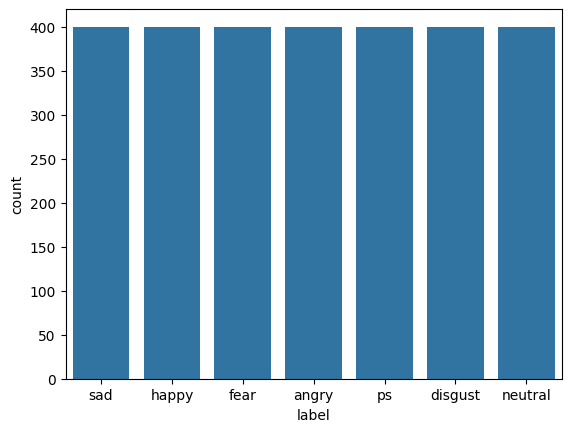

In [ ]:
sns.countplot(x='label', data=df)

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df.drop('label_count',axis=1,inplace=True)
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].unique()

array(['sad', 'happy', 'fear', 'angry', 'ps', 'disgust', 'neutral'],
      dtype=object)

In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_love_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_lean_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_gin_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_chief_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_talk_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_lose_neutral.wav'],
      dtype=object)

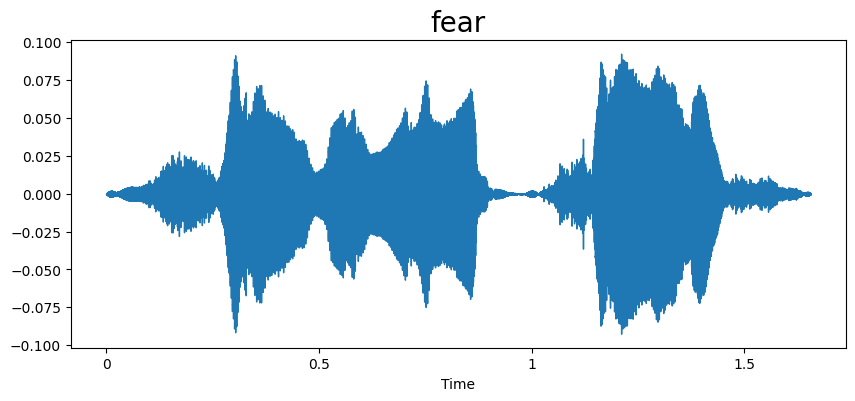

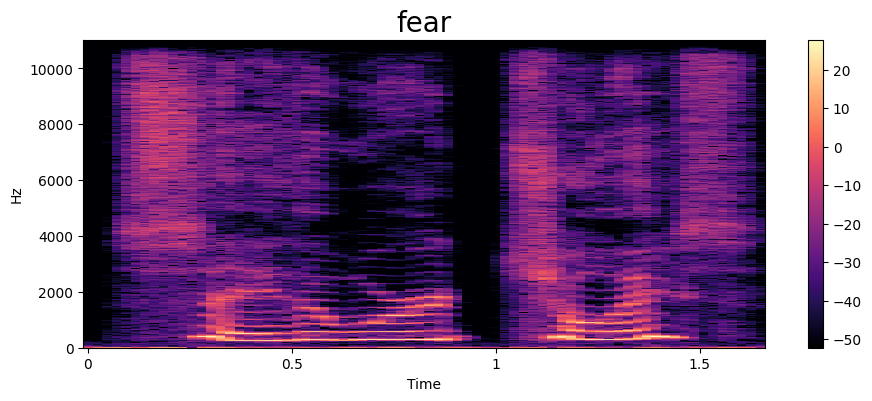

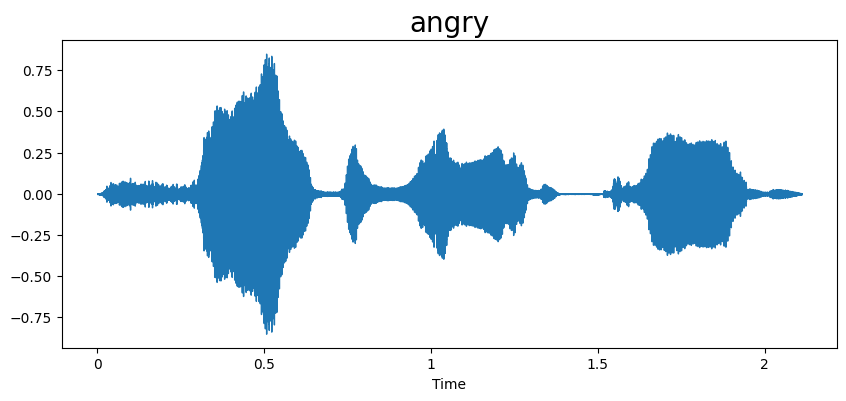

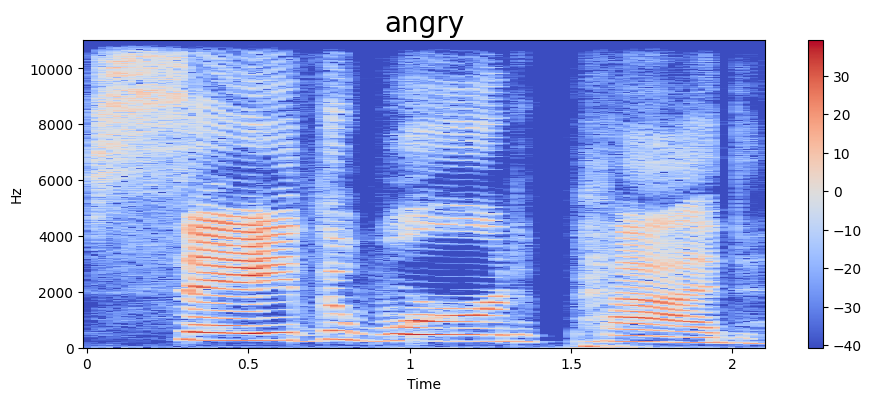

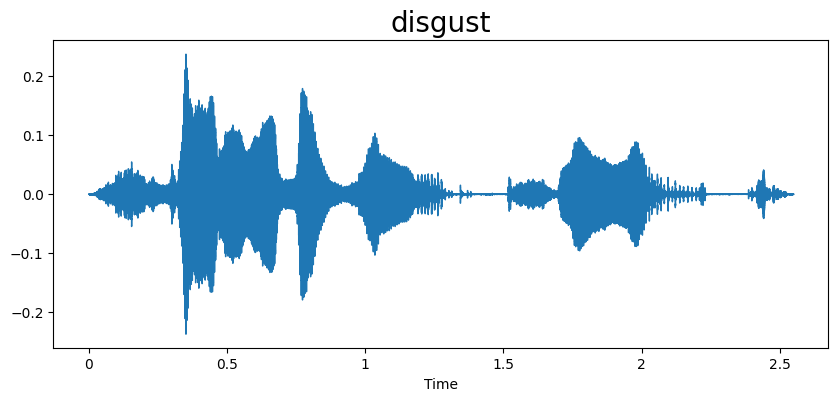

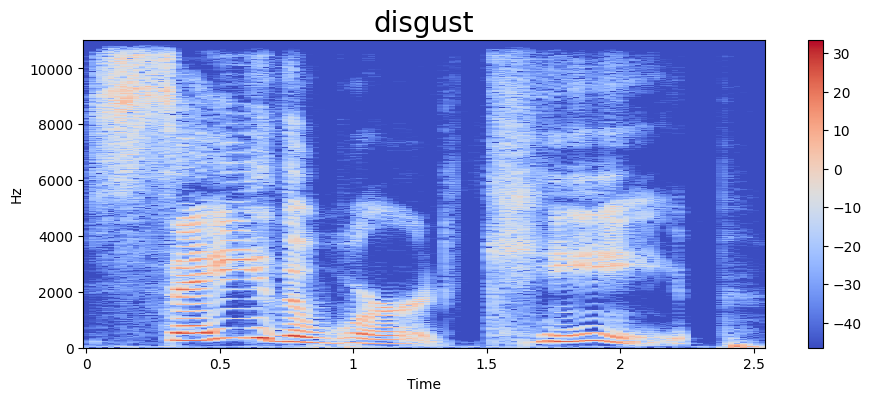

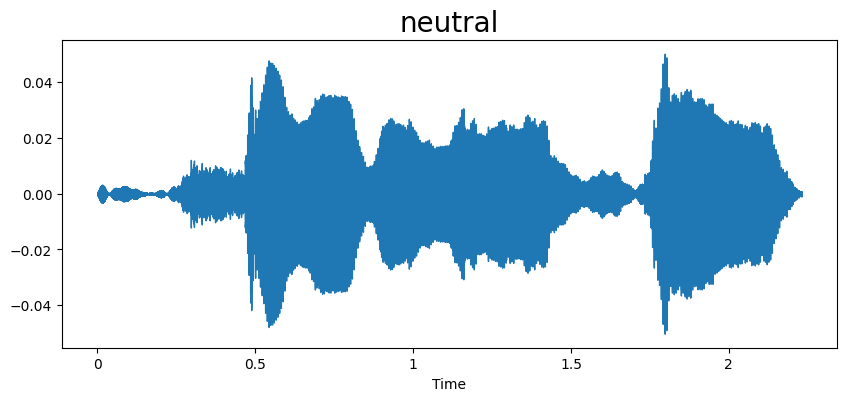

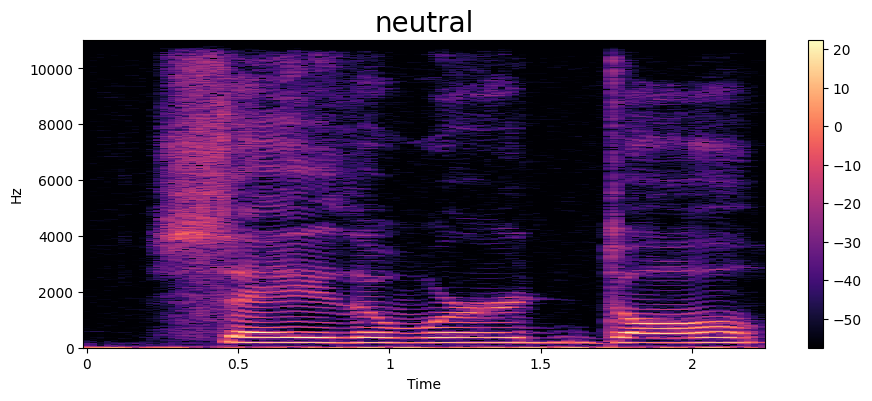

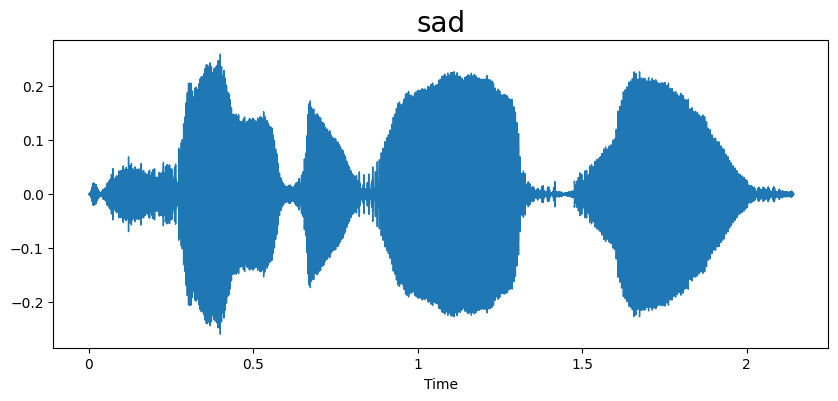

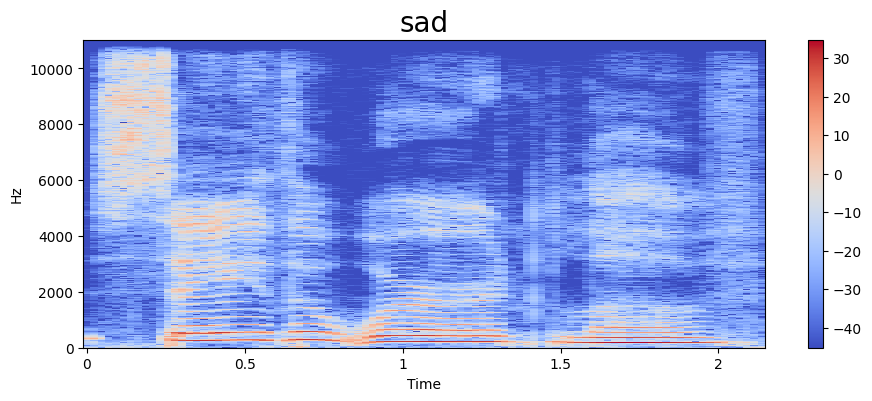

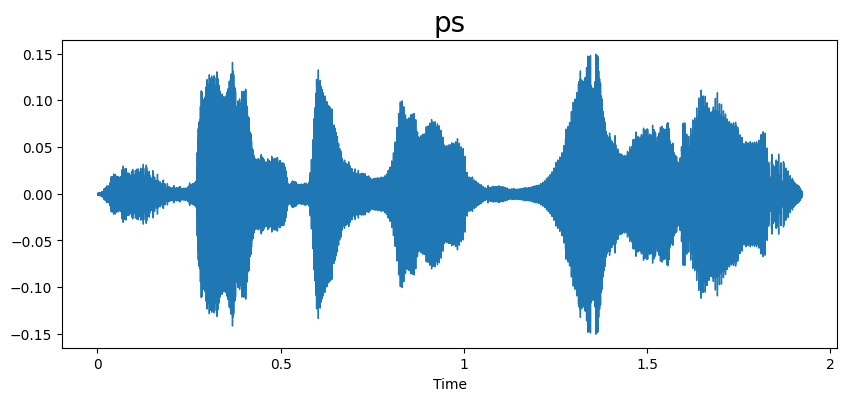

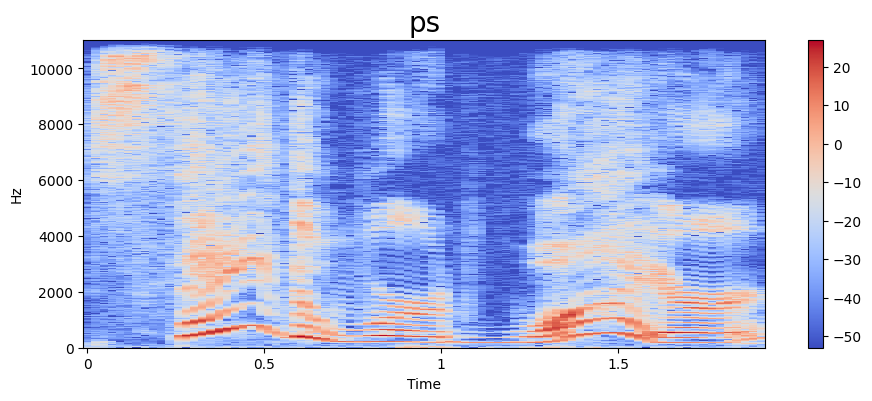

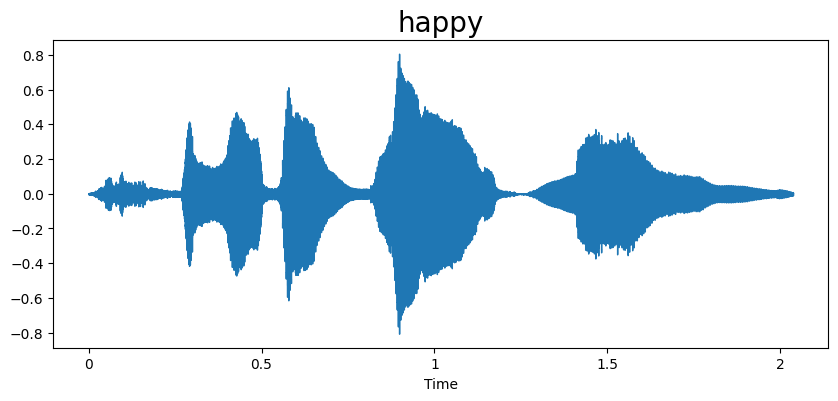

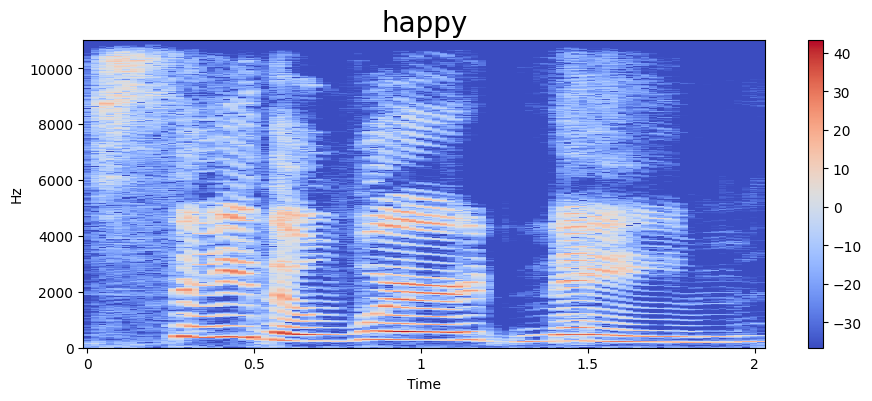

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]    #selecting the first audio file path in df where the label matches the desired emotion
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)            # to play the audio file

emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
'''
MFCC Calculation Steps:

Pre-emphasis: A high-pass filter is applied to the signal to emphasize higher frequencies.
Framing: The audio signal is divided into small overlapping frames to capture short-term spectral features.
Windowing: Each frame is windowed (e.g., using a Hamming window) to reduce spectral leakage.
Fast Fourier Transform (FFT): The Fourier transform is applied to convert each frame from the time domain to the frequency domain.
Power Spectrum: The magnitude of the FFT is squared to obtain the power spectrum.
Mel Filter Bank: The power spectrum is passed through a series of Mel-spaced filters to model human hearing. Each filter sums the power in its frequency range.
Logarithm: The logarithm of the Mel-filtered energies is taken to mimic human loudness perception.
Discrete Cosine Transform (DCT): The DCT is applied to the log Mel spectrum to obtain the cepstral coefficients, which are the MFCCs.
'''


def extract_mfcc(file_name):
  y, sr = librosa.load(file_name, duration=3, offset=0.5)          #offset=start after 0.5sec in the file
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

# extract_mfcc(df['speech'][0])
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-366.0411, 105.86097, 24.696943, 30.794737, -...
1       [-433.25858, 86.88761, 27.7181, 38.007874, 3.6...
2       [-417.9848, 81.954384, 34.81025, 46.359104, -1...
3       [-454.43314, 88.06056, 21.013117, 37.71676, 5....
4       [-414.36447, 58.513573, 26.601133, 35.475563, ...
                              ...                        
2795    [-345.60828, 77.05652, -13.568752, 32.28667, 0...
2796    [-394.5932, 96.80201, -17.622696, 22.088455, -...
2797    [-394.9283, 52.426052, 2.863474, 41.791176, 1....
2798    [-375.37964, 75.45197, -18.429338, 21.804644, ...
2799    [-407.6924, 75.58545, 13.643046, 25.86838, 1.1...
Name: speech, Length: 2800, dtype: object

In [ ]:
'''
Expand the dimensions of the array to add an extra dimension at the end
This is often done to match the input requirements of neural network models
'''

X = [x for x in X_mfcc]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2240, 40, 1), (560, 40, 1), (2240, 7), (560, 7))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val,y_val), batch_size=64)

Epoch 1/30
35/35 [==============================] - 11s 229ms/step - loss: 1.6559 - accuracy: 0.3214 - val_loss: 1.0805 - val_accuracy: 0.5536
Epoch 2/30
35/35 [==============================] - 6s 163ms/step - loss: 1.1037 - accuracy: 0.5580 - val_loss: 0.6597 - val_accuracy: 0.7929
Epoch 3/30
35/35 [==============================] - 8s 217ms/step - loss: 0.7570 - accuracy: 0.7036 - val_loss: 0.4080 - val_accuracy: 0.8464
Epoch 4/30
35/35 [==============================] - 6s 163ms/step - loss: 0.5152 - accuracy: 0.8188 - val_loss: 0.2063 - val_accuracy: 0.9393
Epoch 5/30
35/35 [==============================] - 7s 202ms/step - loss: 0.3520 - accuracy: 0.8942 - val_loss: 0.1619 - val_accuracy: 0.9571
Epoch 6/30
35/35 [==============================] - 6s 163ms/step - loss: 0.2894 - accuracy: 0.9121 - val_loss: 0.1561 - val_accuracy: 0.9589
Epoch 7/30
35/35 [==============================] - 7s 198ms/step - loss: 0.2544 - accuracy: 0.9304 - val_loss: 0.2143 - val_accuracy: 0.9286
Epoch

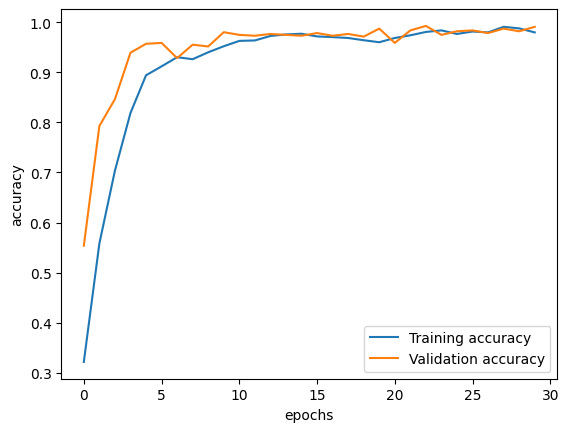

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

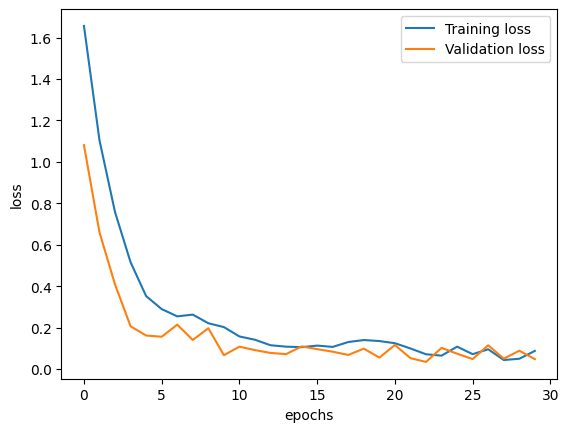

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 [==============================] - 2s 64ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val_classes, y_pred_classes)
cm

array([[84,  0,  0,  0,  0,  0,  0],
       [ 0, 77,  0,  0,  0,  0,  0],
       [ 0,  0, 91,  0,  0,  0,  0],
       [ 1,  0,  0, 76,  0,  2,  0],
       [ 0,  0,  0,  0, 70,  0,  0],
       [ 0,  1,  0,  1,  0, 71,  0],
       [ 0,  0,  0,  0,  0,  0, 86]])

In [ ]:
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print('Classification Report')
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.99      1.00      0.99        84
     disgust       0.99      1.00      0.99        77
        fear       1.00      1.00      1.00        91
       happy       0.99      0.96      0.97        79
     neutral       1.00      1.00      1.00        70
          ps       0.97      0.97      0.97        73
         sad       1.00      1.00      1.00        86

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



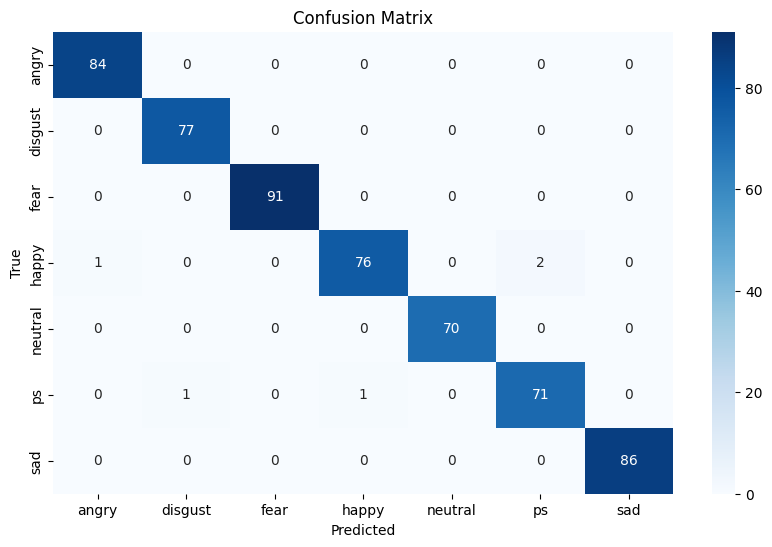

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
prediction = model.predict(X_val[0].reshape(1, 40, 1))
prediction

1/1 [==============================] - 0s 50ms/step


array([[9.9999809e-01, 8.2238166e-08, 9.2182475e-09, 3.9708510e-08,
        5.6541114e-09, 1.6553664e-06, 8.2726494e-08]], dtype=float32)

In [ ]:
df['label'].unique()
label_prediction_map = {label: value for label, value in zip(labels, prediction[0])}
label_prediction_map

{'sad': 8.2726494e-08}

In [ ]:
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
